# Part 1) 
## A. Problem statement
The company is looking at prospective properties to buy to enter the market.
 We are required to build a regression model using regularisation in order to 
 predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.
 
## B. Business Goal 

We are required to model the price of houses with the available independent variables. 
This model will then be used by the management to understand how exactly the prices vary with the variables. 
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## C. The models are developed as following steps:

## 1. Load raw data and have an overview on data quality

(1460, 80)
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


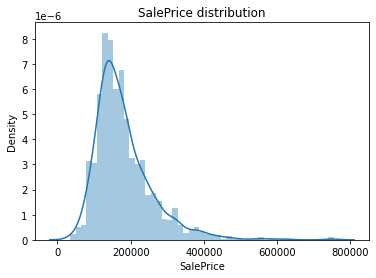

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [36]:
import pandas as pd,numpy as np
import seaborn as sb,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)

df_raw=pd.read_csv('train.csv')
df_raw_target = df_raw['SalePrice']
df_raw.drop(columns='SalePrice',inplace=True)
print(df_raw.shape)
print(df_raw_target.describe())
sb.distplot(df_raw_target,kde=True)
plt.title(f'SalePrice distribution')
plt.show()
df_raw.loc[:,df_raw.isna().sum()>0].info()

#### (1*) Findings:
There are 19 columns have missing data (null or nan). We need to clean them up to ensure data is ready for processing in next steps

In [13]:
#data cleaning
# numeric features
df_raw['LotFrontage'].fillna(value=df_raw['LotFrontage'][df_raw['LotFrontage']>0].mean(),inplace=True)
df_raw['MasVnrArea'].fillna(value=df_raw['MasVnrArea'][df_raw['MasVnrArea']>0].mean(),inplace=True)
df_raw['GarageYrBlt'].fillna(value=df_raw['GarageYrBlt'][df_raw['GarageYrBlt']>0].min(),inplace=True)
#categorical features
df_raw['Alley'].fillna(value='No_alley',inplace=True)
df_raw['MasVnrType'].fillna(value='None_type',inplace=True)
df_raw['BsmtQual'].fillna(value='No_Basement',inplace=True)
df_raw['BsmtCond'].fillna(value='No_Basement',inplace=True)
df_raw['BsmtExposure'].fillna(value='No_Basement',inplace=True)
df_raw['BsmtFinType1'].fillna(value='No_Basement',inplace=True)
df_raw['BsmtFinType2'].fillna(value='No_Basement',inplace=True)
df_raw['Electrical'].fillna(method='ffill',inplace=True)
df_raw['FireplaceQu'].fillna(value= 'No_Fireplace',inplace=True)
df_raw['GarageType'].fillna(value= 'No_Garage',inplace=True) 
df_raw['GarageFinish'].fillna(value= 'No_Garage',inplace=True) 
df_raw['GarageQual'].fillna(value= 'No_Garage',inplace=True) 
df_raw['GarageCond'].fillna(value= 'No_Garage',inplace=True) 
df_raw['PoolQC'].fillna(value= 'No_Pool',inplace=True) 
df_raw['Fence'].fillna(value= 'No_Fence',inplace=True)  
df_raw['MiscFeature'].fillna(value= 'None_Misc',inplace=True)  
       
print(df_raw.loc[:,df_raw.isna().sum()>0].columns)
df_raw.info()
#split numeric and categorical columns for data pre-processing
df_raw_numeric = df_raw.select_dtypes(exclude='object').drop(columns=['Id'])
df_raw_cate =df_raw.select_dtypes(include='object')
print('df_raw_numeric:',df_raw_numeric.shape)
print('df_raw_cate:',df_raw_cate.shape)

Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

## 2. Features' correlations analysis

<Axes: >

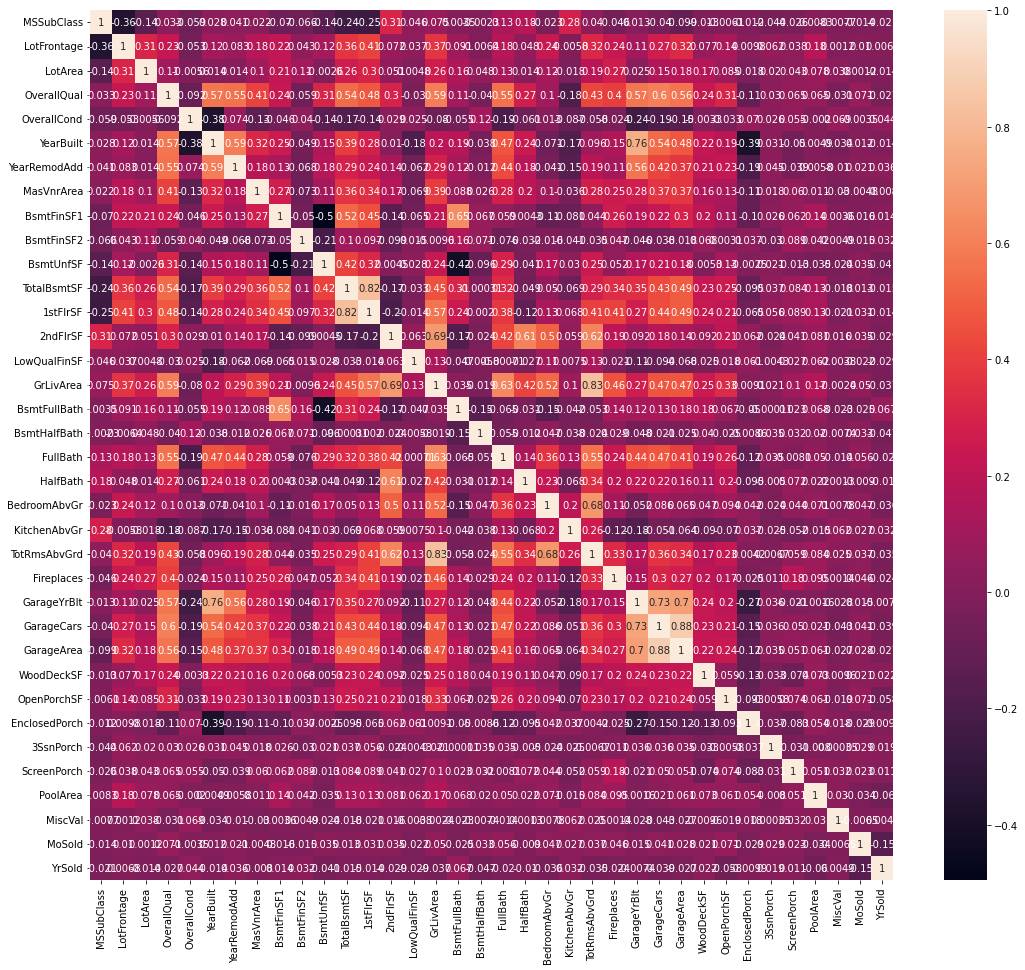

In [3]:
# analyze the correlations between numeric features
df_corr = df_raw_numeric.corr()
plt.figure(figsize=(18,16))
sb.heatmap(df_corr,annot=True)

#### (2*) Findings:
There are many numeric features have strong correlations with others, hence we need to eleminate dependent ones when developing a robust linear regression model. If we use regularization techniques, the Lasso would be preferable  

## 3. Pre-processing: scale numeric columns and encode categorical columns

In [4]:
#scale the numeric columns
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()
df_raw_numeric_scaled = pd.DataFrame(data= std_scaler.fit_transform(df_raw_numeric),columns=df_raw_numeric.columns)
df_raw_numeric_scaled.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.167979,0.043080,0.566591,0.571918,0.719332,0.581096,0.065321,0.078604,0.031580,0.242826,0.173065,0.190139,0.168035,0.010218,0.222582,0.141781,0.028767,0.521689,0.191438,0.358305,0.348858,0.376484,0.204338,0.674097,0.441781,0.333554,0.109970,0.085302,0.039772,0.006712,0.031377,0.003738,0.002806,0.483811,0.453938
std,0.248827,0.075425,0.046653,0.153666,0.139100,0.218862,0.344090,0.113071,0.080811,0.109443,0.189155,0.071801,0.088708,0.211394,0.085005,0.098998,0.172970,0.119376,0.183639,0.251443,0.101972,0.073446,0.135449,0.214889,0.272564,0.186829,0.150779,0.146253,0.121126,0.110723,0.057711,0.116161,0.054441,0.032008,0.245784,0.332024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.029229,0.444444,0.500000,0.594203,0.283333,0.000000,0.000000,0.000000,0.095462,0.130237,0.125746,0.000000,0.000000,0.149868,0.000000,0.000000,0.333333,0.000000,0.250000,0.333333,0.250000,0.000000,0.527273,0.250000,0.235896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000
50%,0.176471,0.167979,0.038227,0.555556,0.500000,0.731884,0.733333,0.000000,0.067948,0.000000,0.204409,0.162275,0.172786,0.000000,0.000000,0.212886,0.000000,0.000000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,0.700000,0.500000,0.338505,0.000000,0.045704,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000
75%,0.294118,0.198630,0.048150,0.666667,0.625000,0.927536,0.900000,0.105000,0.126196,0.000000,0.345890,0.212480,0.242600,0.352542,0.000000,0.271807,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.416667,0.333333,0.918182,0.500000,0.406206,0.196033,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#encode the catagirical columns 
df_raw_cate_dummies = pd.get_dummies(data= df_raw_cate,drop_first=True,dtype='int')
df_raw_cate_dummies.describe()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_None_Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.044521,0.010959,0.788356,0.149315,0.995890,0.937671,0.028082,0.028082,0.006849,0.633562,0.034247,0.024658,0.897945,0.000685,0.064384,0.032192,0.002740,0.720548,0.044521,0.008904,0.001370,0.010959,0.039726,0.019178,0.102740,0.034932,0.068493,0.054110,0.025342,0.011644,0.033562,0.154110,0.006164,0.05000,0.028082,0.05274,0.077397,0.017123,0.050685,0.040411,0.058904,0.017123,0.026027,0.007534,0.055479,0.863014,0.005479,0.013014,0.007534,0.017808,...,0.022603,0.260274,0.472603,0.013699,0.214384,0.595890,0.013014,0.060274,0.006164,0.265068,0.055479,0.055479,0.289041,0.414384,0.032877,0.009589,0.055479,0.002055,0.897945,0.023973,0.006164,0.055479,0.004795,0.908219,0.020548,0.917808,0.001370,0.002055,0.995205,0.036986,0.107534,0.007534,0.807534,0.963014,0.001370,0.033562,0.000685,0.002740,0.001370,0.006164,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,0.206319,0.104145,0.408614,0.356521,0.063996,0.241835,0.165264,0.165264,0.082505,0.481996,0.181924,0.155132,0.302824,0.026171,0.245519,0.176570,0.052289,0.448884,0.206319,0.093973,0.036999,0.104

In [31]:
#concat both dataframes into the final one
df_raw_concat = pd.concat([df_raw_numeric_scaled,df_raw_cate_dummies],axis=1)
# df_raw_concat = df_raw_concat[significant_features[:12]]
df_raw_concat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No_Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_None_Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,0,0,1,0,1,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,0,0,1,0,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,0,0,1,0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,0,0,1,0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,0,0,1,0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.155974,0.142038,0.336077,0.0

#### (3*) Findings: 
After pre-processing raw data, we have a cleaned dataset of 1460 rows and 259 columns (features). It is a high-dimensional dataset

## 4. Split data and train the model

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'best_estimator': Lasso(alpha=100), 'best_params_': {'alpha': 100}, 'r2_score_train': 0.8976939411647806, 'r2_score_test': 0.8723059237402977, 'MAE test': 19242.80942791107}


<Figure size 864x864 with 0 Axes>

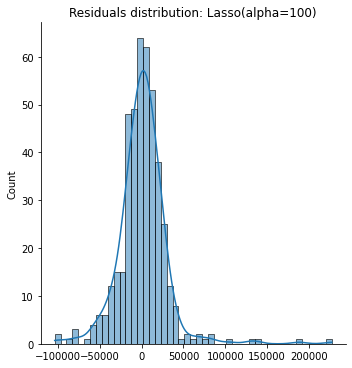

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'best_estimator': Ridge(alpha=10), 'best_params_': {'alpha': 10}, 'r2_score_train': 0.8832205358234074, 'r2_score_test': 0.8586051095973173, 'MAE test': 20292.693417918406}


<Figure size 864x864 with 0 Axes>

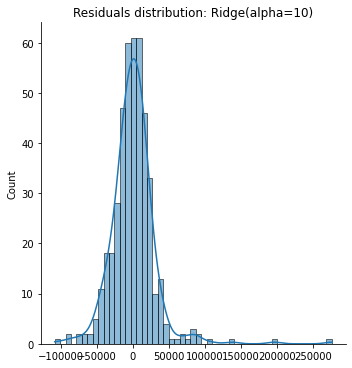

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(df_raw_concat.values,df_raw_target.values,test_size=0.3,random_state=42)
m_features = df_raw_concat.columns
list_results = []

m_grid ={    'alpha' :[0.001, 0.01, 0.1, 1, 10, 100, 1000] }
folds=5
estimators_list = [Lasso(),Ridge()]
for est in estimators_list:
    m_est = est
    m_searchCV  = GridSearchCV(estimator=m_est,
                                scoring='neg_mean_absolute_error',
                                param_grid= m_grid,
                                cv = folds, 
                                    return_train_score=True,
                                    verbose = 1)  
    m_searchCV.fit(X_train,y_train)
    y_train_pred = m_searchCV.predict(X_train)
    y_test_pred = m_searchCV.predict(X_test)
    m_r2_train = r2_score(y_train,y_train_pred)
    m_r2_test = r2_score(y_test,y_test_pred)
    m_MAE = mean_absolute_error(y_test,y_test_pred)
    d_result = { 'best_estimator':m_searchCV.best_estimator_,
                         'best_params_':m_searchCV.best_params_,
                         'r2_score_train':m_r2_train,
                         'r2_score_test':m_r2_test,
                         'MAE test':m_MAE
                         }
    list_results.append(d_result)
    print(d_result)    
    y_res=y_test-y_test_pred
    plt.figure(figsize=(12,12))
    sb.displot(data=y_res,kde=True)
    plt.title(f'Residuals distribution: {d_result["best_estimator"]}')
    plt.show()
    # print(pd.DataFrame(data={'y_test':y_test,'y_test_pred':y_test_pred,'error':y_res}))

    

#### (4*) Findings on best fit models's residuals analysis: 
The optimal lambda (or alpha) for both 2 models as following: Lasso(alpha=100) and Ridge(alpha=10), they have resulted not-perfectly fitted Normal Distributions due to some outliers (abnormally-high) sales prices where the models cannot fit them all. However, they are well-fitting for most points and residuals mostly vary from -100,000 to +100,000 - centering at 0; their r2_scores are around 0.86 (very well) and Mean Absolute Error-MAE is around 19000 ~ 10% SalePrice (median 163000, mean 181000). Hence, we accept these models for prediction in next steps of analysis

In [33]:
# best models
dict_compare={'m_features':m_features}
for r in list_results:
    m_est = r['best_estimator']
    m_est.fit(X_train,y_train)
    dict_compare[m_est] = map(lambda x: round(x,2), m_est.coef_)

df_para = pd.DataFrame(data=dict_compare)
# df_para.sort_values(by=, ascending=False,inplace=True)
sorted_df = df_para.iloc[df_para[df_para.iloc[:,1].name].abs().sort_values(ascending=False).index]
significant_features = sorted_df[sorted_df.iloc[:,1]!=0]['m_features'].values
sorted_df[sorted_df['m_features'].isin(significant_features)].reset_index(drop=1)

,m_features,Lasso(alpha=100),Ridge(alpha=10)
0,GrLivArea,171873.36,35840.33
1,PoolQC_Gd,-111917.00,-19303.85
2,OverallQual,90042.11,49011.50
3,Condition2_PosN,-86958.45,-17347.33
4,GarageCars,48484.66,32020.06
5,Neighborhood_StoneBr,43867.02,31189.50
6,Neighborhood_NoRidge,43767.94,34711.76
7,Exterior2nd_ImStucc,36327.71,20888.70
8,Neighborhood_NridgHt,31221.65,22758.43
9,LotArea,30516.21,13472.76


#### (4**) Out of 259 full features, according to the best Lasso(alpha=100) model resulted, we have 106 features selected those are significant to the target variable SalePrice. And their significant Coef are sorted from highest to lowest above.

### 5. Analyze top 12 features have highest coef_ factors

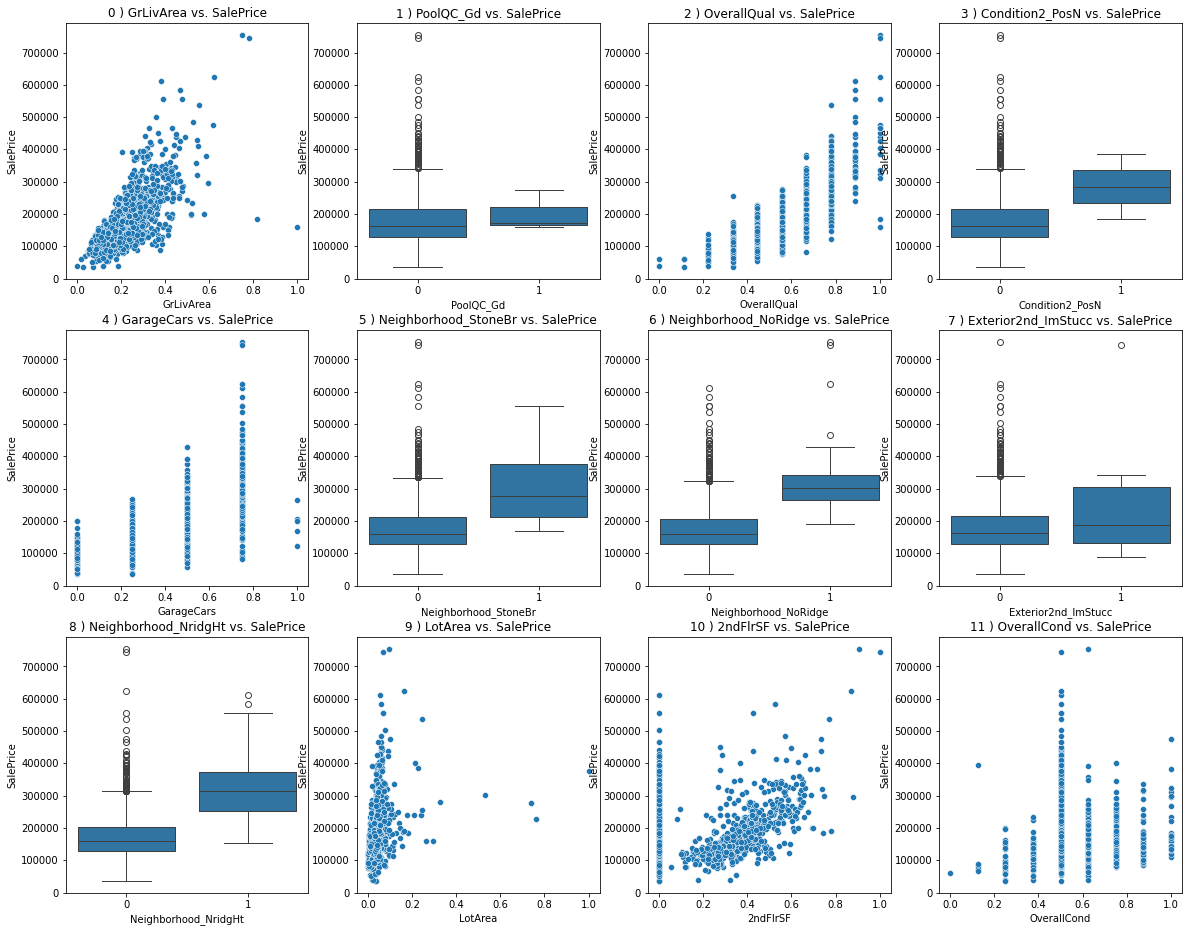

In [37]:
# visualize the relationship between top 12 significant predictors and SalePrice
plt.figure(figsize=(20,16))
n=12
for id,it in enumerate(significant_features[0:n]):
    # print(id,it)
    plt.subplot(int(n/4),4,id+1)
    sb.boxplot(x=df_raw_concat[it],y=df_raw_target) if df_raw_cate_dummies.columns.str.contains(it).any() else sb.scatterplot(x=df_raw_concat[it],y=df_raw_target)
    plt.title(f'{id} ) {it} vs. SalePrice')

plt.show()
# df_raw_cate_dummies.columns.str.contains('PoolQC_Gd').any()

#### (5*) Findings: Top 12 features have significant trends vs./impacts on the SalePrice visually. It provides us some hints for deeper numeric analysis on how they impact on the salePrice

In [34]:
#concat both dataframes into the final one
df_raw_concat = pd.concat([df_raw_numeric_scaled,df_raw_cate_dummies],axis=1)
df_raw_concat = df_raw_concat[significant_features[:n]]
df_raw_concat

,GrLivArea,PoolQC_Gd,OverallQual,Condition2_PosN,GarageCars,Neighborhood_StoneBr,Neighborhood_NoRidge,Exterior2nd_ImStucc,Neighborhood_NridgHt,LotArea,2ndFlrSF,OverallCond
0,0.259231,0,0.666667,0,0.50,0,0,0,0,0.033420,0.413559,0.500
1,0.174830,0,0.555556,0,0.50,0,0,0,0,0.038795,0.000000,0.875
2,0.273549,0,0.666667,0,0.50,0,0,0,0,0.046507,0.419370,0.500
3,0.260550,0,0.666667,0,0.75,0,0,0,0,0.038561,0.366102,0.500
4,0.351168,0,0.777778,0,0.75,0,1,0,0,0.060576,0.509927,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.247362,0,0.555556,0,0.50,0,0,0,0,0.030929,0.336077,0.500
1456,0.327619,0,0.555556,0,0.50,0,0,0,0,0.055505,0.000000,0.625
1457,0.377920,0,0.666667,0,0.25,0,0,0,0,0.036187,0.557869,1.000
1458,0.140166,0,0.444444,0,0.25,0,0,0,0,0.039342,0.000000,0.625


Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'best_estimator': Lasso(alpha=100), 'best_params_': {'alpha': 100}, 'r2_score_train': 0.7886433806148329, 'r2_score_test': 0.8157679483329865, 'MAE test': 23390.44182238638}


<Figure size 864x864 with 0 Axes>

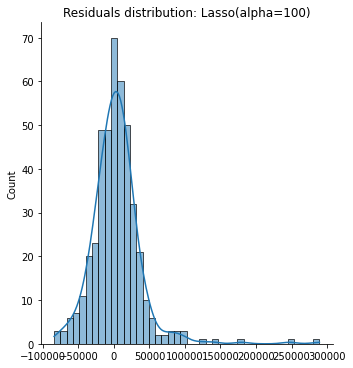

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'best_estimator': Ridge(alpha=1), 'best_params_': {'alpha': 1}, 'r2_score_train': 0.787283444683318, 'r2_score_test': 0.8100342944540883, 'MAE test': 23680.520893705183}


<Figure size 864x864 with 0 Axes>

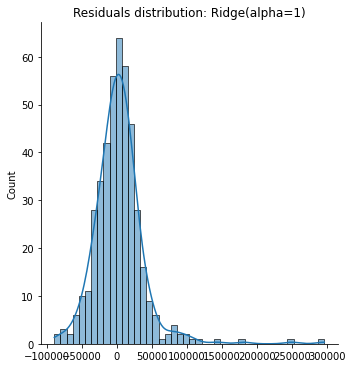

In [35]:
# run girdSearchCV again with top 12 features to evaluate the new models performance
X_train, X_test, y_train, y_test = train_test_split(df_raw_concat.values,df_raw_target.values,test_size=0.3,random_state=42)
m_features = df_raw_concat.columns
list_results = []

m_grid ={    'alpha' :[0.001, 0.01, 0.1, 1, 10, 100, 1000] }
folds=5
estimators_list = [Lasso(),Ridge()]
for est in estimators_list:
    m_est = est
    m_searchCV  = GridSearchCV(estimator=m_est,
                                scoring='neg_mean_absolute_error',
                                param_grid= m_grid,
                                cv = folds, 
                                    return_train_score=True,
                                    verbose = 1)  
    m_searchCV.fit(X_train,y_train)
    y_train_pred = m_searchCV.predict(X_train)
    y_test_pred = m_searchCV.predict(X_test)
    m_r2_train = r2_score(y_train,y_train_pred)
    m_r2_test = r2_score(y_test,y_test_pred)
    m_MAE = mean_absolute_error(y_test,y_test_pred)
    d_result = { 'best_estimator':m_searchCV.best_estimator_,
                         'best_params_':m_searchCV.best_params_,
                         'r2_score_train':m_r2_train,
                         'r2_score_test':m_r2_test,
                         'MAE test':m_MAE
                         }
    list_results.append(d_result)
    print(d_result)    
    y_res=y_test-y_test_pred
    plt.figure(figsize=(12,12))
    sb.displot(data=y_res,kde=True)
    plt.title(f'Residuals distribution: {d_result["best_estimator"]}')
    plt.show()
    # print(pd.DataFrame(data={'y_test':y_test,'y_test_pred':y_test_pred,'error':y_res}))


### (5*) Findings on top 12 features' models:
The models of top 12 significant features resulted r2_score for test data is around 81%, decreased 0.5-0.6% comparing to r2_score of test data from the full features' models first run (Mean Absolute Error-MAE is around 23500 comparing to last MAE of 19500 ~ 2% MAE increased). Therefore, we can find the models simplied with top 12 features (fewer but significant features) can also result approximately same same prediction performance in comparing to the models with full 259 features (or reduced to 105 features by the model Lasso(alpha=100)). And, up to the business expectation, we can decide which models (simplifed or full features) to be selected for the prediction.

## 6. Summary on conclusion
- The top 12 features significant in predicting the price of a house are: GrLivArea, PoolQC_Gd, OverallQual, Condition2_PosN, GarageCars, Neighborhood_StoneBr, Neighborhood_NoRidge, Exterior2nd_ImStucc, Neighborhood_NridgHt, LotArea, 2ndFlrSF, and	OverallCond. They are accounting for around 81% variances of predicted results vs. actual results, and around 13% of Mean Abs. Errors/Mean (or Median) of a house's price.
- THe optimal lamda (or alpha) for Lasso and Ridge regression as following:
    + Lasso(alpha=100) and Ridge(alpha=10): for all full 259 features as model's inputs/predictors
    + Lasso(alpha=100) and Ridge(alpha=1): for top 12 significant features as model's inputs/predictors